Importing all functions

In [262]:
%matplotlib inline

from functions import *

In [263]:
# read all cleaned csv files
df_category_translation = pd.read_csv('../../data/cleaned/category_translation.csv')
df_customers = pd.read_csv('../../data/cleaned/customers.csv')
df_geolocation = pd.read_csv('../../data/cleaned/geolocation.csv')
df_items = pd.read_csv('../../data/cleaned/items_no_outliers.csv')
df_orders = pd.read_csv('../../data/cleaned/orders.csv')
df_payments = pd.read_csv('../../data/cleaned/payments.csv')
df_products = pd.read_csv('../../data/cleaned/products.csv')
df_reviews = pd.read_csv('../../data/cleaned/reviews.csv')
df_sellers = pd.read_csv('../../data/cleaned/sellers.csv')
df_states = pd.read_csv('../../data/cleaned/states.csv')

In [264]:
df_category_translation = df_category_translation.copy()
df_customers = df_customers.copy()
df_geolocation = df_geolocation.copy()
df_items = df_items.copy()
df_orders = df_orders.copy()
df_payments = df_payments.copy()
df_products = df_products.copy()
df_reviews = df_reviews.copy()
df_sellers = df_sellers.copy()
df_states = df_states.copy()

### Understanding the timestamp between df_items and df_orders

In [265]:
df_items.head()

,order_id,item_id,product_id,seller_id,shipping_limit_timestamp,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [266]:
df_orders[df_orders['order_id'] == '00010242fe8c5a6d1ba2dd792cb16214']

,order_id,customer_id,status,purchase_timestamp,approved_timestamp,delivered_carrier_timestamp,delivered_customer_timestamp,estimated_delivery_timestamp
85267,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00


### Understanding price and freight_value in df_items compared to value in df_payments

In [267]:
df_items[df_items['order_id'] == '00010242fe8c5a6d1ba2dd792cb16214']

,order_id,item_id,product_id,seller_id,shipping_limit_timestamp,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


In [268]:
df_payments[df_payments['order_id'] == '00010242fe8c5a6d1ba2dd792cb16214']

,order_id,sequential,type,installments,value
82825,00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,2,72.19


In [269]:
df_reviews.head(3)

,review_id,order_id,score,title,message,creation_timestamp,answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,0,0,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,0,0,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,0,0,2018-02-17 00:00:00,2018-02-18 14:36:24


In [270]:
df_orders[df_orders['order_id'] == '73fc7af87114b39712e6da79b0a377eb']

,order_id,customer_id,status,purchase_timestamp,approved_timestamp,delivered_carrier_timestamp,delivered_customer_timestamp,estimated_delivery_timestamp
1871,73fc7af87114b39712e6da79b0a377eb,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00


### Understand the difference between order_id in items and payments

The amount of order_id in items and payments are different. <br>
Does it mean that some order_id doesn't make it into payment?

In [271]:
items_order_ids = set(df_items['order_id'])
payments_order_ids = set(df_payments['order_id'])

In [272]:
# Find order_ids that appear in both dataframes
common_order_ids = items_order_ids.intersection(payments_order_ids)
len(common_order_ids)

94881

In [273]:
# Find order_ids that are in items but not in payments
only_in_items = items_order_ids - payments_order_ids

# Find order_ids that are in payments but not in items
only_in_payments = payments_order_ids - items_order_ids

In [274]:
# Print the results
print(f"Total unique order_ids: {len(items_order_ids.union(payments_order_ids))}")
print(f"Order_ids in both dataframes: {len(common_order_ids)}")
print(f"Order_ids only in items: {len(only_in_items)}")
print(f"Order_ids only in payments: {len(only_in_payments)}")

Total unique order_ids: 97904
Order_ids in both dataframes: 94881
Order_ids only in items: 524
Order_ids only in payments: 2499


It is proved that all order_id in items are going to payments. However, some order_id is paid with two different payment method, for example, voucher and credit card. <br>
**For calculating the revenue, it's best to use df_items**

## Create new dataframes for analysis

### **SALES**

Combine columns from various dataframes: <br>
- `df_items` : order_id, item_id, product_id, price, freight_value. <br>
- `df_orders` : (filter status = delivered) customer_id, approved_timestamp. <br> 
- `df_customers` : customer_id, city, state_code. <br>
- `df_geolocation` : latitude, longitude. <br>
- `df_states` : state_name, population. <br>
- `df_products` : category_name. <br>
- `df_category_translation` : category_english. <br>

In [275]:
df_sales = df_items[['order_id','item_id','product_id','price','freight_value']]

Merge df_sales and df_orders (only with delivered status).

In [276]:
"Prefered type of Join as your initial left table doesn't change and you specify on which column to perform the column"

# Merge df_sales and df_orders DataFrames on the 'order_id' column (left join)
df_sales = pd.merge(df_sales, df_orders, on='order_id', how='left')

There is somehow an error in the system that not all delivered packages have approved_timestamp. So, let's choose purchase_timestamp.

In [277]:
# take only required columns
required_columns = ['order_id','item_id', 'product_id','price','freight_value','customer_id','purchase_timestamp','status']
df_sales = df_sales[required_columns]

In [278]:
df_sales.dtypes

order_id               object
item_id                 int64
product_id             object
price                 float64
freight_value         float64
customer_id            object
purchase_timestamp     object
status                 object
dtype: object

In [279]:
df_sales.isna().sum()

order_id              0
item_id               0
product_id            0
price                 0
freight_value         0
customer_id           0
purchase_timestamp    0
status                0
dtype: int64

Filter only the with 'delivered' status for the certainty that the package has been delivered to customer.

In [280]:
df_sales['status'].value_counts()

status
delivered      104973
shipped          1131
canceled          484
invoiced          320
processing        319
unavailable         6
approved            3
Name: count, dtype: int64

In [281]:
df_sales = df_sales[df_sales['status'] == 'delivered']

In [282]:
df_sales = df_sales.drop(columns='status')

Change data type of purchase_timestamp into datetime format.

In [283]:
df_sales['purchase_timestamp'] = pd.to_datetime(df_sales['purchase_timestamp'])

In [284]:
df_sales.dtypes

order_id                      object
item_id                        int64
product_id                    object
price                        float64
freight_value                float64
customer_id                   object
purchase_timestamp    datetime64[ns]
dtype: object

Merge df_sales and df_customers to take the data of city and state_code

In [285]:
df_sales = pd.merge(df_sales, df_customers, on='customer_id', how='left')

In [286]:
df_sales = df_sales.drop(columns=['unique_id'])

In [287]:
# Check missing value

df_sales.isna().sum()

order_id              0
item_id               0
product_id            0
price                 0
freight_value         0
customer_id           0
purchase_timestamp    0
zip_code_prefix       0
city                  0
state_code            0
unique_index          0
dtype: int64

Merge df_sales and df_geolocation to take the data of latitude and longitude.

In [288]:
df_sales = pd.merge(df_sales, df_geolocation, on=['zip_code_prefix','city','state_code','unique_index'], how='left')

In [289]:
df_sales.head()

,order_id,item_id,product_id,price,freight_value,customer_id,purchase_timestamp,zip_code_prefix,city,state_code,unique_index,latitude,longitude
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,28013,campos dos goytacazes,RJ,28013_campos dos goytacazes_RJ,-21.763186,-41.310265
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,15775,santa fe do sul,SP,15775_santa fe do sul_SP,-20.222902,-50.898297
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,35661,para de minas,MG,35661_para de minas_MG,-19.869745,-44.592968
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,12952,atibaia,SP,12952_atibaia_SP,-23.105968,-46.590277
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,13226,varzea paulista,SP,13226_varzea paulista_SP,-23.243402,-46.827614


In [290]:
df_sales.shape

(104973, 13)

In [291]:
# Check missing value

df_sales.isna().sum()

order_id                0
item_id                 0
product_id              0
price                   0
freight_value           0
customer_id             0
purchase_timestamp      0
zip_code_prefix         0
city                    0
state_code              0
unique_index            0
latitude              575
longitude             575
dtype: int64

Check missing values

In [292]:
missing_values = df_sales[df_sales['latitude'].isnull()]
missing_values

,order_id,item_id,product_id,price,freight_value,customer_id,purchase_timestamp,zip_code_prefix,city,state_code,unique_index,latitude,longitude
233,009fa9bd0d92710e840793bfefa80867,1,617186c3d97ea56c9c683a8a3974e8c1,84.99,15.34,ed19fa6ce948d52be769926c2baaa17c,2017-06-14 09:44:30,38710,major porto,MG,38710_major porto_MG,NaN,NaN
419,010b143d83a59b355cd5a75c0f0fd785,1,6ff1fc9209c7854704a4f75c9fac41b4,22.00,34.15,c181ea8a3ec364246642e36dae84bf30,2017-08-30 23:28:35,76870,ariquemes,RO,76870_ariquemes_RO,NaN,NaN
420,010b143d83a59b355cd5a75c0f0fd785,2,6ff1fc9209c7854704a4f75c9fac41b4,22.00,34.15,c181ea8a3ec364246642e36dae84bf30,2017-08-30 23:28:35,76870,ariquemes,RO,76870_ariquemes_RO,NaN,NaN
421,010b143d83a59b355cd5a75c0f0fd785,3,6ff1fc9209c7854704a4f75c9fac41b4,22.00,34.15,c181ea8a3ec364246642e36dae84bf30,2017-08-30 23:28:35,76870,ariquemes,RO,76870_ariquemes_RO,NaN,NaN
759,01d3d4cb8c553d507dfd26fbd8b41e95,1,33e77eecc23c25a65d10f627e5053617,114.94,34.16,814dfd64a142fe2564faef3932b676b9,2017-10-29 14:52:54,28655,monnerat,RJ,28655_monnerat_RJ,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103926,fd5c73fb6edc88486582bf0a0bb989aa,1,5861173d9af66445f070078cfc29a597,199.99,13.84,c348e5bd22ca24a447a221536c71d8b3,2018-04-09 11:34:37,12770,pinheiros,SP,12770_pinheiros_SP,NaN,NaN
104375,fe784ed3dfc728fd4de44fa9918fe1eb,1,9ac1378f05cd222b3fb34a3cccc626c7,39.90,18.08,534ae76adc5da4b4f9c7b505a756d59d,2018-07-31 18:24:05,71574,brasilia,DF,71574_brasilia_DF,NaN,NaN
104412,fe94f63f2f4d326a6da25bfe07ffaf93,1,86ecc269de40ba13205e7beeee12f26f,29.99,15.31,1dbe0bf136ea8849ed9648546ebc2e63,2018-08-02 12:07:12,73082,brasilia,DF,73082_brasilia_DF,NaN,NaN
104552,feeb572a755207d889d166ca90221c84,1,40e8b425d1a26e2d9cb77363523e05ce,69.90,60.95,757bbd8c61a5fd67d5b8c18efd987beb,2017-12-07 18:00:45,69980,cruzeiro do sul,AC,69980_cruzeiro do sul_AC,NaN,NaN


In [293]:
df_geolocation[(df_geolocation['zip_code_prefix'] == '38710') & (df_geolocation['city'] == 'major porto') & (df_geolocation['state_code'] == 'MG')]

,zip_code_prefix,city,state_code,latitude,longitude,unique_index


In [294]:
# It's also checked in the raw data but it still has missing value. So, it's better to drop it.
# df_geolocation[(df_geolocation['geolocation_zip_code_prefix'] == '38710') & (df_geolocation['geolocation_city'] == 'major porto') & (df_geolocation['geolocation_state'] == 'MG')]

In [295]:
missing_values['price'].min() # Output: 5.6
missing_values['price'].max() # Output: 610
missing_values['price'].mean() # Output: 108.8

108.80518260869566

We can drop the missing values.

In [296]:
df_sales = df_sales.dropna()

Merge df_sales and df_states to take the data of state_name and population.

In [297]:
df_sales = pd.merge(df_sales, df_states, on=['state_code'], how='left')

In [298]:
df_sales = df_sales.drop(columns=['unique_index','population'])

Merge df_sales and df_products to take the data of category_name.

In [299]:
df_sales = pd.merge(df_sales, df_products, on=['product_id'], how='left')

In [300]:
df_sales = df_sales.drop(columns=['name_length','description_length','photos_quantity','weight_g','length_cm','height_cm','width_cm'])

Merge df_sales and df_category_translation to take the data of category_english.

In [301]:
df_sales = pd.merge(df_sales, df_category_translation, on=['category'], how='left')

In [302]:
df_sales.head(3)

,order_id,item_id,product_id,price,freight_value,customer_id,purchase_timestamp,zip_code_prefix,city,state_code,latitude,longitude,state_name,category,category_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,13.29,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,28013,campos dos goytacazes,RJ,-21.763186,-41.310265,Rio de Janeiro,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,15775,santa fe do sul,SP,-20.222902,-50.898297,São Paulo,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.0,17.87,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,35661,para de minas,MG,-19.869745,-44.592968,Minas Gerais,moveis_decoracao,furniture_decor


In [303]:
df_sales['category'].nunique()

74

In [304]:
df_sales.isna().sum()

order_id                 0
item_id                  0
product_id               0
price                    0
freight_value            0
customer_id              0
purchase_timestamp       0
zip_code_prefix          0
city                     0
state_code               0
latitude                 0
longitude                0
state_name               0
category                 0
category_english      1491
dtype: int64

In [305]:
df_sales['category_english'] = df_sales['category_english'].fillna(df_sales['category'])

In [306]:
df_sales.head()

,order_id,item_id,product_id,price,freight_value,customer_id,purchase_timestamp,zip_code_prefix,city,state_code,latitude,longitude,state_name,category,category_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,28013,campos dos goytacazes,RJ,-21.763186,-41.310265,Rio de Janeiro,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,15775,santa fe do sul,SP,-20.222902,-50.898297,São Paulo,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,35661,para de minas,MG,-19.869745,-44.592968,Minas Gerais,moveis_decoracao,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,12952,atibaia,SP,-23.105968,-46.590277,São Paulo,perfumaria,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,13226,varzea paulista,SP,-23.243402,-46.827614,São Paulo,ferramentas_jardim,garden_tools


In [307]:
df_sales.isna().sum()

order_id              0
item_id               0
product_id            0
price                 0
freight_value         0
customer_id           0
purchase_timestamp    0
zip_code_prefix       0
city                  0
state_code            0
latitude              0
longitude             0
state_name            0
category              0
category_english      0
dtype: int64

Check duplicates

In [308]:
data_exploration(df_sales)

Number of rows: 104398
Number of columns: 15
Number of duplicates: 0

Numerical Columns: Index(['item_id', 'price', 'freight_value', 'zip_code_prefix', 'latitude',
       'longitude'],
      dtype='object')

Categorical Columns: Index(['order_id', 'product_id', 'customer_id', 'city', 'state_code',
       'state_name', 'category', 'category_english'],
      dtype='object')


,Column,Data Type,Non-Null Count,Missing Values,Unique Values
0,order_id,object,104398,0,92821
1,item_id,int64,104398,0,3
2,product_id,object,104398,0,30660
3,price,float64,104398,0,5142
4,freight_value,float64,104398,0,5412
5,customer_id,object,104398,0,92821
6,purchase_timestamp,datetime64[ns],104398,0,92329
7,zip_code_prefix,int64,104398,0,14515
8,city,object,104398,0,3936
9,state_code,object,104398,0,26


In [309]:
df_sales['category_english'].value_counts()

category_english
bed_bath_table                                   10657
health_beauty                                     9052
sports_leisure                                    8154
furniture_decor                                   7674
computers_accessories                             7263
                                                 ...  
la_cuisine                                          14
portateis_cozinha_e_preparadores_de_alimentos       11
pc_gamer                                             8
fashion_childrens_clothes                            7
security_and_services                                2
Name: count, Length: 74, dtype: int64

Save df_sales into cleaned data

In [310]:
df_sales.to_csv('../../data/cleaned/df_sales.csv', index=False)

# EDA

### Numerical columns

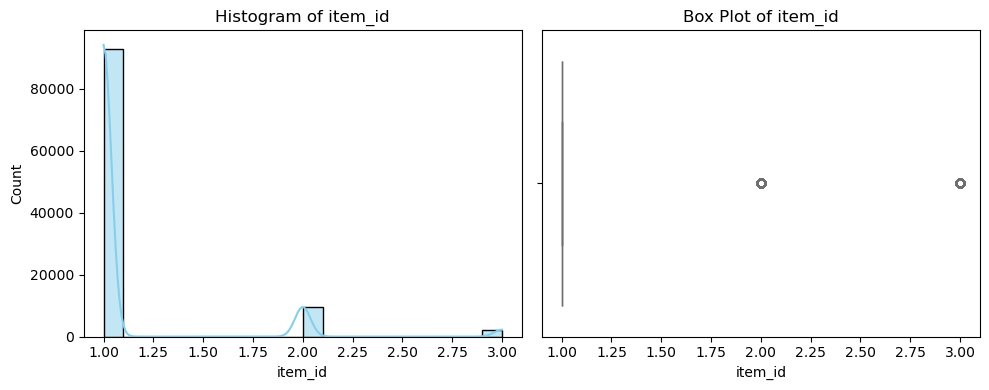

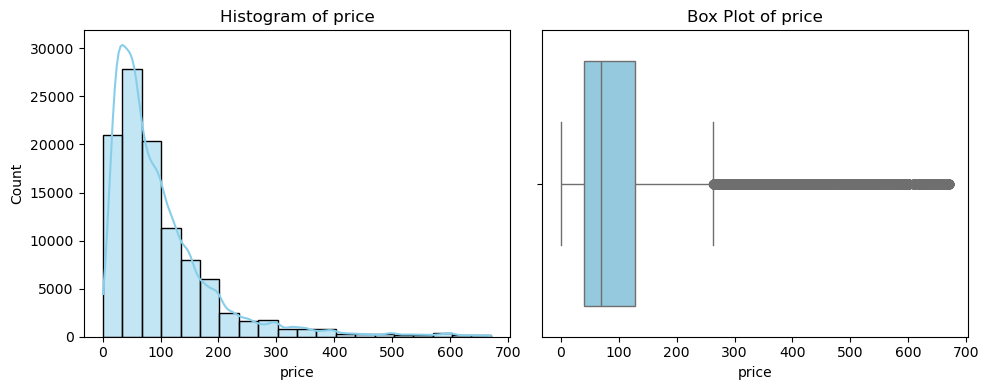

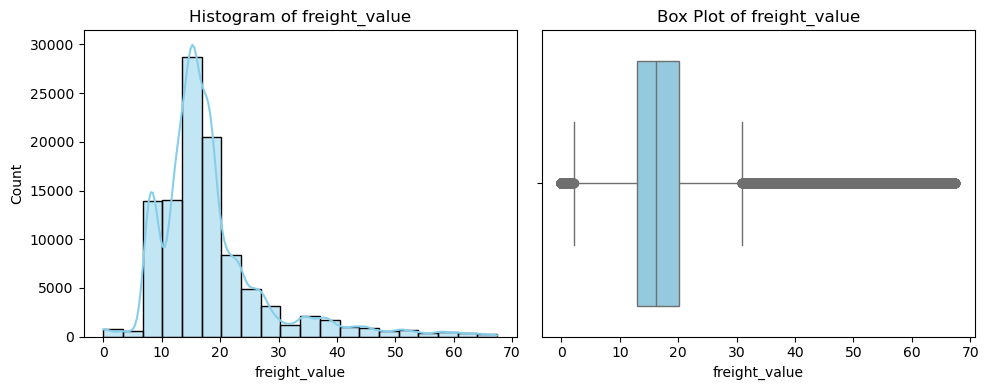

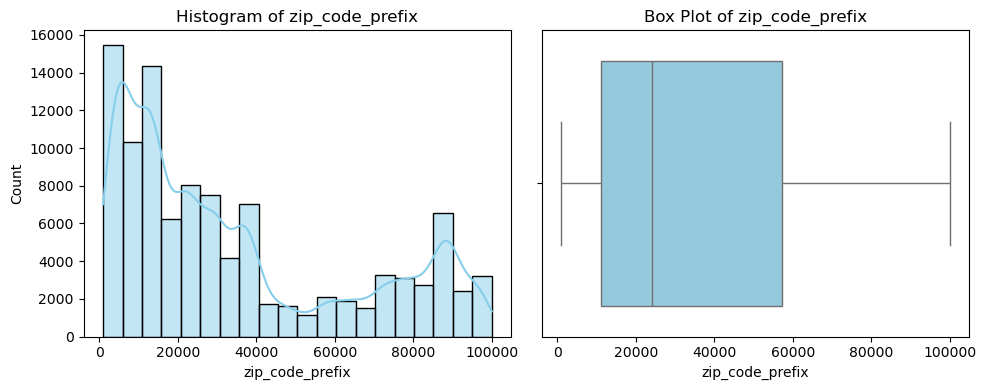

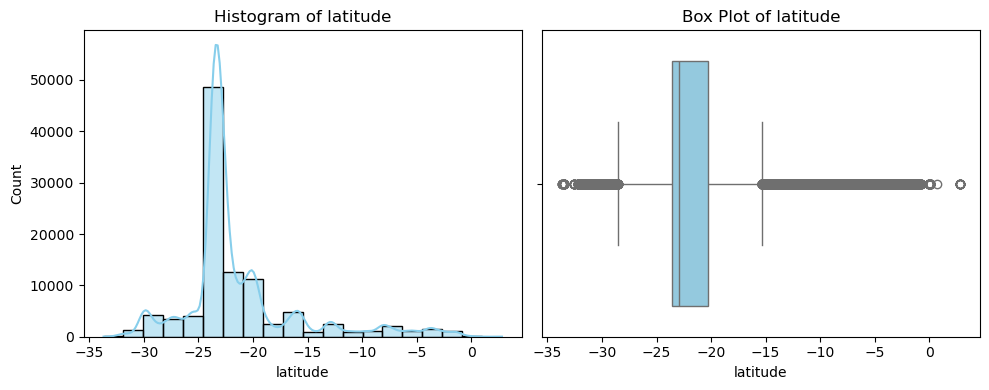

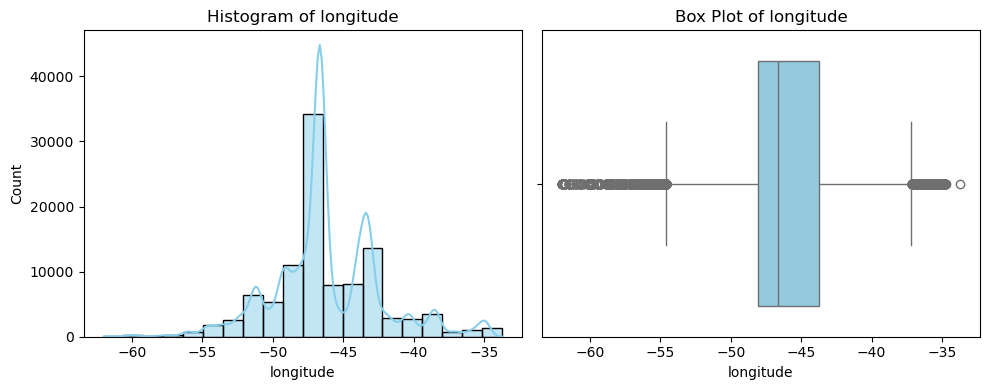

,Column,Mean,Median,Mode,Variance,Standard Deviation,Min Value,Max Value,Range,Interquartile Range,Skewness,Kurtosis
0,item_id,1.13,1.00,1.00,1.600000e-01,0.40,1.000000,3.000000,2.000000,0.000000,3.12,9.49
1,price,100.27,69.99,59.90,8.795210e+03,93.78,0.850000,670.000000,669.150000,89.100000,2.47,8.14
2,freight_value,18.26,16.11,15.10,9.354000e+01,9.67,0.000000,67.400000,67.400000,7.210000,2.01,5.30
3,zip_code_prefix,34680.75,24020.00,22790.00,8.897247e+08,29828.25,1003.000000,99980.000000,98977.000000,46155.000000,0.81,-0.73
4,latitude,-21.36,-22.94,-23.01,2.937000e+01,5.42,-33.689824,2.814040,36.503864,3.296461,1.66,3.21
5,longitude,-46.18,-46.63,-43.46,1.504000e+01,3.88,-62.010859,-33.722628,28.288231,4.364868,0.27,1.14


In [311]:
univariate_numerical(df_sales)

Check correlation between numerical columns

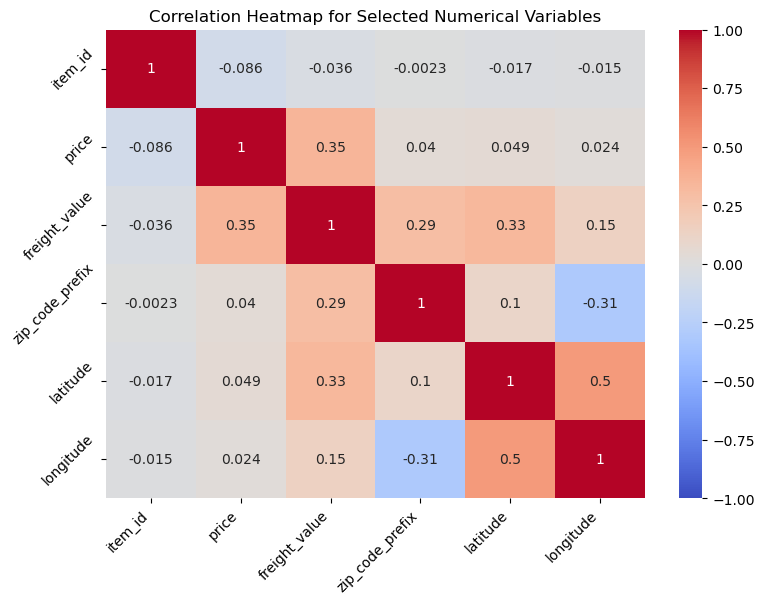

In [312]:
# check correlation with a heatmap

correlation_matrix = df_sales.select_dtypes(include=[np.number]).corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(8, 6))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap="coolwarm", 
            vmin=-1,  # Set the minimum of the colorbar to -1
            vmax=1,   # Set the maximum of the colorbar to 1
            center=0) # Center the colorbar at 0

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Rotate y-axis labels
plt.yticks(rotation=45, ha='right')

# Adjust the bottom and top of the plot to ensure labels are not cut off
plt.tight_layout()

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

### Categorical columns

Categorize total purchase

In [313]:

df_sales['purchase_category'] = pd.cut(df_sales['price'], 
                                bins=3, 
                                labels=['Small', 'Medium', 'Big'])

In [314]:
# To see the bin ranges
bin_ranges = pd.cut(df_sales['price'], bins=3)
bin_ranges

0          (0.181, 223.9]
1         (223.9, 446.95]
2          (0.181, 223.9]
3          (0.181, 223.9]
4          (0.181, 223.9]
               ...       
104393    (223.9, 446.95]
104394    (223.9, 446.95]
104395     (0.181, 223.9]
104396     (0.181, 223.9]
104397     (0.181, 223.9]
Name: price, Length: 104398, dtype: category
Categories (3, interval[float64, right]): [(0.181, 223.9] < (223.9, 446.95] < (446.95, 670.0]]

In [315]:
df_sales.head()

,order_id,item_id,product_id,price,freight_value,customer_id,purchase_timestamp,zip_code_prefix,city,state_code,latitude,longitude,state_name,category,category_english,purchase_category
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,28013,campos dos goytacazes,RJ,-21.763186,-41.310265,Rio de Janeiro,cool_stuff,cool_stuff,Small
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,15775,santa fe do sul,SP,-20.222902,-50.898297,São Paulo,pet_shop,pet_shop,Medium
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,35661,para de minas,MG,-19.869745,-44.592968,Minas Gerais,moveis_decoracao,furniture_decor,Small
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,12952,atibaia,SP,-23.105968,-46.590277,São Paulo,perfumaria,perfumery,Small
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,13226,varzea paulista,SP,-23.243402,-46.827614,São Paulo,ferramentas_jardim,garden_tools,Small


In [316]:
summary_categorical_correlation(df_sales, 'purchase_category')

,Column,Chi2 p-value,Cramer V
0,order_id,1.070392e-237,0.994281
1,product_id,0.000000e+00,0.979893
2,customer_id,1.070392e-237,0.994281
3,city,2.445839e-27,0.211031
4,state_code,3.054810e-29,0.034936
5,state_name,3.054810e-29,0.034936
6,category,0.000000e+00,0.183043
7,category_english,0.000000e+00,0.183043


In this case, analysis on categorical correlation seems to not giving any significant insight. The only thing that may correlate with the purchase are city and category. 

## Create df_revenue_state to calculate purchase per capita of each state

In [317]:
df_revenue_state = df_sales.groupby(['state_code','state_name']).agg({'item_id':'count','price':'sum'}).sort_values(by='price',ascending=False).reset_index()
df_revenue_state = df_revenue_state.rename(columns={'item_id':'item_count','price':'revenue'})

Merge df_sales_summary and df_states to take population, then, calculate revenue per capita.

In [318]:
df_revenue_state = pd.merge(df_revenue_state, df_states, on=['state_code','state_name'], how='left')

In [319]:
df_revenue_state.head(3)

,state_code,state_name,item_count,revenue,population
0,SP,São Paulo,44750,4251864.27,44411238
1,RJ,Rio de Janeiro,13459,1382924.55,16055174
2,MG,Minas Gerais,12331,1247782.66,21279353


Calculate revenue_per_capita in 1000 inhabitants

In [320]:
df_revenue_state['revenue_per_capita'] = (df_revenue_state['revenue']/df_revenue_state['population']*1000).round(2)

In [321]:
df_revenue_state = df_revenue_state.sort_values(by='revenue_per_capita', ascending=False).reset_index()

In [324]:
#df_revenue_state.drop(columns='index', inplace=True)

In [329]:
total_revenue_per_capita = df_revenue_state['revenue_per_capita'].sum()
df_revenue_state['percentage_revenue_per_capita'] = (df_revenue_state['revenue_per_capita']/total_revenue_per_capita).round(3)

In [330]:
df_revenue_state

,state_code,state_name,item_count,revenue,population,revenue_per_capita,percentage_revenue_per_capita
0,ES,Espírito Santo,2120,211908.13,17798,11906.29,0.510
1,SC,Santa Catarina,3878,396042.08,36964,10714.26,0.459
2,SP,São Paulo,44750,4251864.27,44411238,95.74,0.004
3,RJ,Rio de Janeiro,13459,1382924.55,16055174,86.14,0.004
4,DF,Distrito Federal,2078,212403.56,2817381,75.39,0.003
5,MG,Minas Gerais,12331,1247782.66,21279353,58.64,0.003
6,RS,Rio Grande do Sul,5833,592280.06,10882965,54.42,0.002
7,PR,Paraná,5380,539920.51,11623091,46.45,0.002
8,GO,Goiás,2121,227621.33,7056495,32.26,0.001
9,MT,Mato Grosso,949,106959.34,3658649,29.23,0.001


Save to a new csv

In [331]:
df_revenue_state.to_csv('../../data/cleaned/df_revenue_state.csv')

## Create df_category to calculate based on category

In [257]:
df_category = df_sales.groupby(['category','category_english']).agg({
                'item_id': 'count',
                'price': 'sum'
                }).rename(columns={
                'item_id': 'item_count',
                'price': 'revenue'
                }).sort_values(by='item_count', ascending=False).reset_index()

In [258]:
df_category

,category,category_english,item_count,revenue
0,cama_mesa_banho,bed_bath_table,10657,967713.55
1,beleza_saude,health_beauty,9052,1008934.77
2,esporte_lazer,sports_leisure,8154,818729.87
3,moveis_decoracao,furniture_decor,7674,637797.14
4,informatica_acessorios,computers_accessories,7263,729985.07
...,...,...,...,...
69,la_cuisine,la_cuisine,14,2054.99
70,portateis_cozinha_e_preparadores_de_alimentos,portateis_cozinha_e_preparadores_de_alimentos,11,876.63
71,pc_gamer,pc_gamer,8,1306.95
72,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,7,519.95


In [259]:
total_revenue = df_category['revenue'].sum()
df_category['percentage_revenue'] = (df_category['revenue']/total_revenue).round(3)

In [260]:
df_category.head()

,category,category_english,item_count,revenue,percentage_revenue
0,cama_mesa_banho,bed_bath_table,10657,967713.55,0.092
1,beleza_saude,health_beauty,9052,1008934.77,0.096
2,esporte_lazer,sports_leisure,8154,818729.87,0.078
3,moveis_decoracao,furniture_decor,7674,637797.14,0.061
4,informatica_acessorios,computers_accessories,7263,729985.07,0.070


Save it to a new csv file.

In [261]:
df_category.to_csv('../../data/cleaned/df_category.csv')